This course was Funded by the European Union through the DIGIQ project (GA 101084035). Views and opinions expressed are however those of the author(s) only and do not necessarily reflect those of the European Union. Neither the European Union nor the granting authority can be held responsible for them.

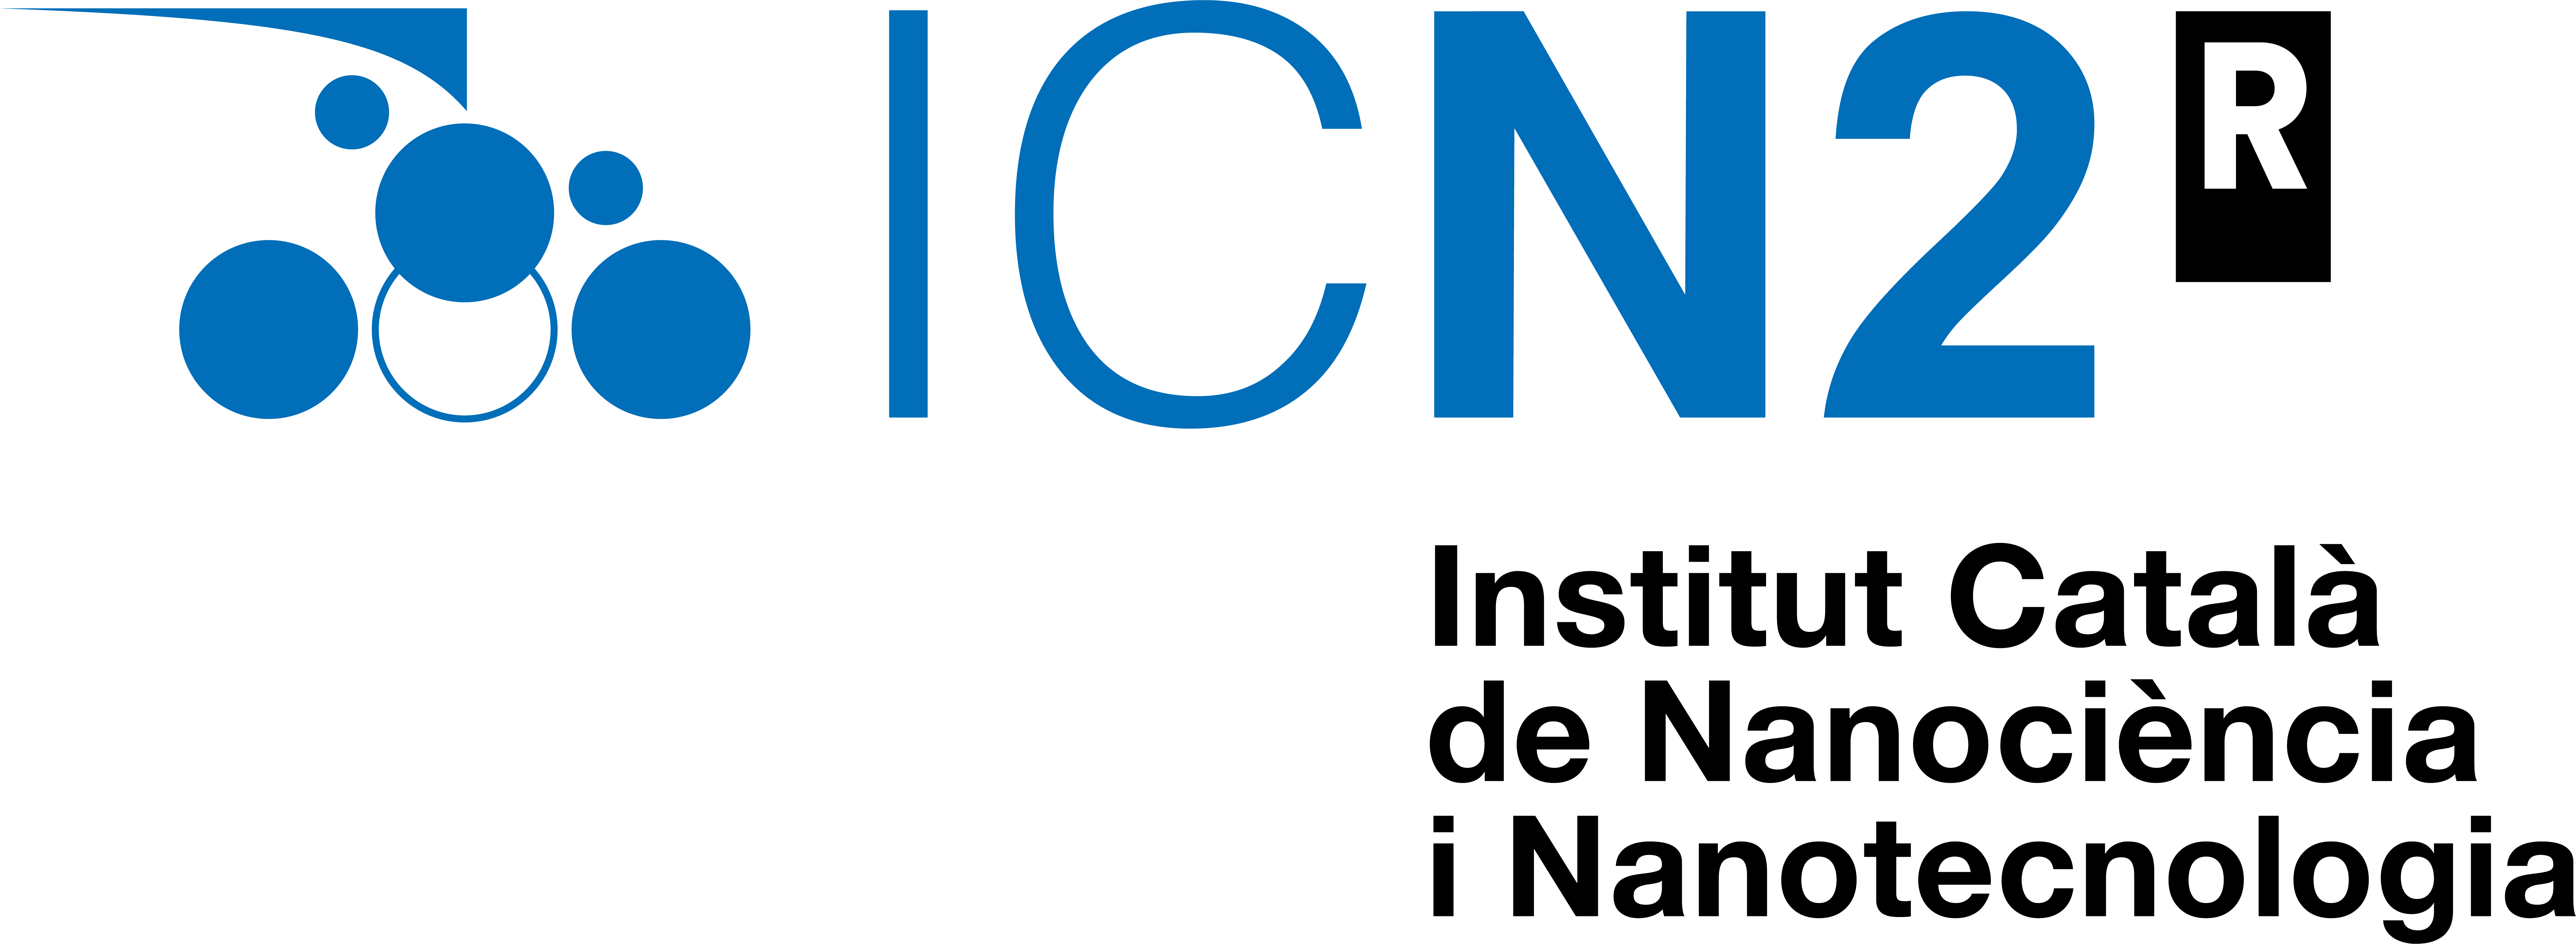

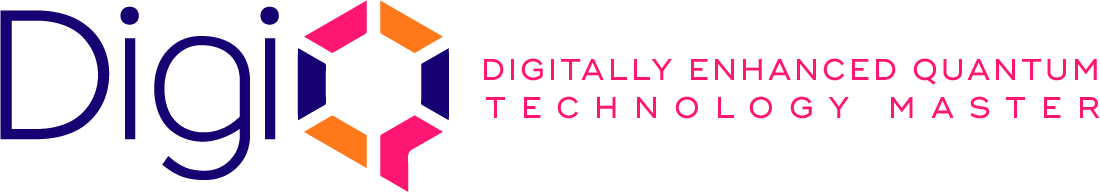

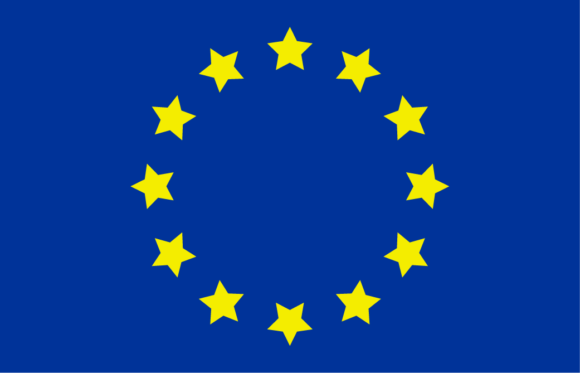


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Step 0: Python Package Installation

In [ ]:
%%bash
rm -Rf topquantmat/ && git clone https://github.com/quantummasterbarcelonacode/topquantmat.git&>log
cd topquantmat
bash pull_from_conda.sh
conda install -c conda-forge ipympl -y&>log

Installing packages for the activity
conda is installed
All requested packages already installed.


In [ ]:
from IPython.display import display, Math,Markdown #Allow to manipulate expressions and how to display them
import numpy as np  #Package for handling numerical math
import sympy as sp  #Package for handling symbolic  math
from sympy import Q #Q is a way to input constrains
from sympy import latex # Convert sympy expression into latex to render in display
from sympy import oo

#IMPORTANT
import topquantmat.tutorial as my #A package build for this session. Feel free to explore it.
import qsymm        #Package to build models using symmetries

from google.colab import output
output.enable_custom_widget_manager()

#Matplot lib is the plottong library
import matplotlib as mp
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib widget

print(my.welcome)
def my_print(message):
  display(Markdown(message))
def print_eq(suffix, eq):
  display(Markdown(suffix + r" $%s$ "%latex(eq)))

def VelOP(Psi,E, coord_syst, vars ):
  D = sp.diff;  kron_delta=my.delta;
  dim = len(E);
  V = [ sp.eye(dim),sp.eye(dim) ]
  if coord_syst=="polar":
    k,phi= vars;
    for i,x in enumerate(vars):
      for m in range(dim):
        for n in range(dim):
          V[i][m,n]= D(E[m],x)* kron_delta(m,n) + (E[m]-E[n])*my.dot( Psi[m], D(Psi[n],x) );
    V[1]=V[1]/k;
    return [sp.simplify(V[0]),sp.simplify(V[1])]

Packages are loaded. ¡Welcome!


# General Definitions

In [ ]:
my_print("**Cartesian momentum**")
k_x, k_y,k_z = sp.symbols(["k_x","k_y","k_z"], real=True);
momenta= sp.Array([k_x,k_y, k_z]);

print_eq(r"$\vec{k}=$",momenta);

**Cartesian momentum**

$\vec{k}=$ $\left[\begin{matrix}k_{x} & k_{y} & k_{z}\end{matrix}\right]$ 

In [ ]:
my_print("**Polar momentum**")
k     = sp.Symbol("k",positive=True);
phi   = sp.Symbol("phi",real=True);
polar =[ (  k_x,  k*sp.cos(phi) ) ,
         (  k_y,  k*sp.sin(phi) )
         ];
print_eq(r"$\vec{k}=$",[k*sp.cos(phi),k*sp.sin(phi),k_z]);

**Polar momentum**

$\vec{k}=$ $\left[ k \cos{\left(\phi \right)}, \  k \sin{\left(\phi \right)}, \  k_{z}\right]$ 

In [ ]:
my_print("**Pauli matrices**")
sig0 = sp.Matrix([[1,    0],[0   , 1]]);
sigx = sp.Matrix([[0,    1],[1   , 0]]);
sigy = sp.Matrix([[0,-sp.I],[sp.I, 0]]);
sigz = sp.Matrix([[1,    0],[0   ,-1]]);
spins= [sigx,sigy,sigz];

for i,spin in zip(('x','y','z'),spins):
  print_eq(r"$\sigma_{%s}=$"%i,spin);

**Pauli matrices**

$\sigma_{x}=$ $\left[\begin{matrix}0 & 1\\1 & 0\end{matrix}\right]$ 

$\sigma_{y}=$ $\left[\begin{matrix}0 & - i\\i & 0\end{matrix}\right]$ 

$\sigma_{z}=$ $\left[\begin{matrix}1 & 0\\0 & -1\end{matrix}\right]$ 

# Haldane Model

**Your turn!** We will use the knowledge to evaluate the Berry curvature of the Haldanene Model, which is simply graphene, without time-reversal symmetry, and *other* ingredients

**Write here: Name and email address**

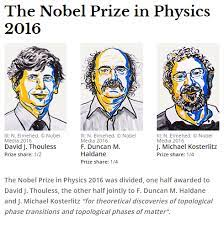

## Geometry

Please, copy here graphene's geometry, including two new hopping vectors:

('a','a', lat_vec[0]) a hopping from a to a

('b','b', lat_vec[0]) a hopping from b to b


## Symmetries and Symmetry-base model
* In a paper, determine graphene's symmetries.
* Copy here graphene's symmetries and use qsymm to build the model.
* For the model, define the positive symbols: varepsilon_0, t_1,t_2, lambda_H; \
and pass it to the hamiltonian generator as coeffs=[E_0,t_2,lambda_H,t_1]
* Print the Model
Dont forget the .subs(*my.euler)

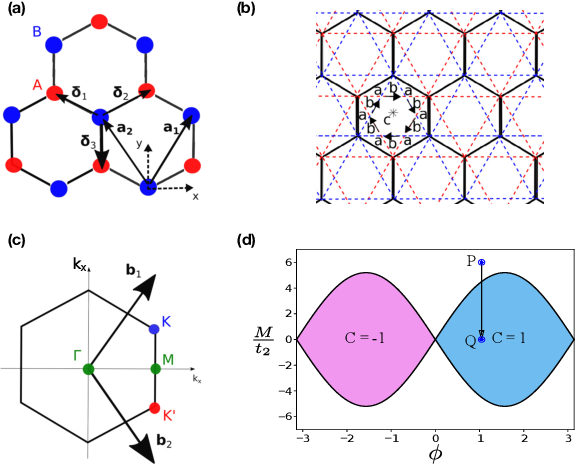

## Dispersion Relation
* Replace $\varepsilon_0\rightarrow 0$ and Replace $t_2 \rightarrow 0$
* Compute the eigenvalues
* Print the Dispersion relation

## The low-energy $(\vec{k}\cdot\vec{p})$ Hamiltonian
* Replace $t\rightarrow 2v/\sqrt{3} $ and $\lambda_H \rightarrow \Delta/3\sqrt{3} $
* Evaluate the low-energy Hamiltonian at the K points
* Compare the Hamiltonian with those previously obtained

## Berry Curvature
* Copy here conv_cart and conv_polar variables
* Compute the eigenvectors and express them in conv_polar
* Compute the velocity operator using the function we previously defined
* Compute the Chern number
* Does it change sign with valleys?